In [85]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from IPython.display import  clear_output
import time
import PyPDF2
from pathlib import Path
from tqdm.auto import tqdm
from typing import Optional
from langchain.text_splitter import RecursiveCharacterTextSplitter

device = 'cuda' if torch.cuda.is_available() else 'cpu'

DEFAULT_MODEL = "meta-llama/Llama-3.2-3B-Instruct"


model = AutoModelForCausalLM.from_pretrained(
    DEFAULT_MODEL,
    torch_dtype=torch.bfloat16,
    use_safetensors=True,
    device_map=device,
)

tokenizer = AutoTokenizer.from_pretrained(DEFAULT_MODEL, use_safetensors=True)
tokenizer.pad_token_id = tokenizer.eos_token_id
model.generation_config.pad_token_id = 128001

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [38]:
# Helper function

def llm_generate(messages, max_tokens=256,do_sample=False):
    prompt = tokenizer.apply_chat_template(messages, tokenize=False)
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    # print(prompt)

    with torch.no_grad():
        output = model.generate(
            **inputs,
            do_sample=do_sample,
            max_new_tokens=max_tokens,
        )

    processed_text = tokenizer.decode(output[0][len(inputs.input_ids[0])+3:], skip_special_tokens=True)

    return processed_text

In [45]:
with open("resume_full.txt", "r", encoding="utf-8") as f:
    raw_resume_text = f.read()

In [46]:
from langchain.text_splitter import MarkdownHeaderTextSplitter,TokenTextSplitter,RecursiveCharacterTextSplitter,NLTKTextSplitter,SpacyTextSplitter

In [47]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=0)
resume_chunks = text_splitter.split_text(raw_resume_text)

In [71]:
import re

for idx,c in enumerate(resume_chunks):
    c=re.sub(r'\*+', '', c)
    c=re.sub(r'\#+', '', c)
    print(c.strip('*'))
    print('*'*50)
    resume_chunks[idx]=c

 Diffusion-Based Tasks  
1. Synthetic Data Generation for Wheels  
   - Data was generated using diffusion models to improve training for object detection tasks.  
   - Metric: Model Tr-OCR trained only on synthetic images performed poorly but improved when mixed with real images.  
   - Key Skill: Generative AI
**************************************************
2. Fine-Tuning Stable Diffusion for Industrial Use Cases  
   - Fine-tuned Stable Diffusion for detecting industrial components like shock absorbers and left screws.  
   - Metric: Required only 10-20 images and 20-30 minutes of training.  
   - Key Skill: Diffusion Model Fine-Tuning   python
**************************************************
3. Diffusion-Based OCR Data Augmentation  
   - Experimented with using diffusion models to generate text-based data for OCR training.  
   - Metric: Challenges included curved text and lack of full-text captions, affecting model accuracy.  
   - Key Skill: OCR and Generative AI   python
*

# Extract Keyword from the job posting

In [94]:
SYSTEM_PROMPT = ''' Environment: iPython
You are a specialized model for extracting key information from job postings. Your task is to read the provided job description and identify the key hard skills required for the position. Hard skills refer to specific, teachable abilities such as programming languages, tools, technologies, certifications, or techniques that are directly related to the job role.
No nned to add any suffix or prefix to your response. give output as a python list of strings.
'''

messages = [
    {"role": "system", "content": SYSTEM_PROMPT},
    {"role": "user", "content": f'''

Do you want to work in a company with the purpose of helping patients around the world? Do you want to learn and grow every day? Do you want to change healthcare? 



Lyfegen is a fast-growing health-tech company making healthcare more accessible and affordable by delivering solutions for healthcare payers and pharma to identify the right drug pricing agreements, simulate and understand the financial impacts of those agreements, and automate the management of them. 



We are seeking a passionate and skilled AI Engineer. This role focuses on leading and driving AI initiatives, optimizing simulations to support drug pricing negotiations, and improving our LLM-based chatbot to facilitate learning about drug reimbursements. This position offers an exciting opportunity to join a dynamic team at the forefront of innovation in healthcare technology.



We are doing things nobody has done before! Thus, creative problem solving is a must and a get-things-done mentality a definitive requirement. 



 

Your main responsibilities: 

Lead all the AI initiatives inside the Lyfegen platform.
Discover and benchmark different strategies for fast and accurate RAG on tabular data sources. Evaluate methods to achieve efficient and precise question-answering.
Orchestrate and compose AI-supported toolchains. Use your knowledge of existing components, models and libraries such as LangChain and GPT to create AI toolchains to support diverse user tasks on the Lyfegen Platform.
Support Lyfegen internal users with machine learning tooling. Provide ML tools and automations to streamline and enhance our internal workflows and processes.
Work with our internal Product Owners to translate company vision into technical specs and collaborate with engineers to solve challenges.


Who you are: 

Machine learning and NLP expertise:
Solid understanding of machine learning algorithms such as gradient boosted trees.
Experience in multiple large language models (LLMs) specifically for Q&A and chat.
Experience in benchmarking and optimizing toolchains.
Proficiency in AI-relevant programming languages such as Python. Familiarity with frameworks and libraries such as TensorFlow, PyTorch and LangChain.
Familiarity with databases for storing and retrieving data for AI models. (SQLAlchemy,Alembic)
Expertise in Python-based Web frameworks such as Flask, Django or FastAPI.
Research mindset by owning an AI feature/product end to end building server-side software that delivers AI inference results, aiming for reliable, scalable systems that seamlessly integrate into our products.
AI toolchain integration skills. Ability to integrate and orchestrate AI tools and libraries into cohesive, user-friendly, and performant systems. 
Experience in recommendation engines is a bonus, particularly in apps involving pricing.
Strong problem-solving abilities to identify issues and evaluate solutions.
Analytical skills to implement effective AI strategies.
Excellent interpersonal and communication skills to work effectively with stakeholders.
Ability to translate business requirements into user-friendly AI-enabled solutions.
Hands-on experience with retrieval-augmented generation (RAG) on tabular data.




What we offer: 

Join a company with a purposeful vision and mission. 
Direct influence on the growth and success of Lyfegen. 
The possibility to work flexibly. 
Become part of a team of international high performers. 
Opportunities for professional development and career advancement.
'''},
]

extracted_keywords = llm_generate(messages,max_tokens=256)
print(extracted_keywords)



['Python', 'Machine Learning', 'NLP', 'Gradient Boosted Trees', 'Large Language Models', 'TensorFlow', 'PyTorch', 'LangChain', 'SQLAlchemy', 'Alembic', 'Flask', 'Django', 'FastAPI', 'Recommendation Engines', 'Retrieval-Augmented Generation']


In [72]:
from sentence_transformers import CrossEncoder

In [73]:
model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

reference_chunk = '''['Python', 'C++', 'Machine Learning', 'Computer Vision', 'Data Preparation', 'Statistical Analysis', 'Data Visualization', 'Algorithm Development', 'Model Optimization', 'Deployment', 'Integration', 'Real-World Testing', 'Model Monitoring']'''# Initialize with the first chunk

similarity_threshold=-6
sc=[]
similar_chunk=[]
for chunk in resume_chunks:
    pairs = [[reference_chunk, chunk]]
    scores = model.predict(pairs)
    similarity_score = scores[0]
    sc.append(similarity_score)

    if similarity_score > similarity_threshold:
        similar_chunk.append(chunk)

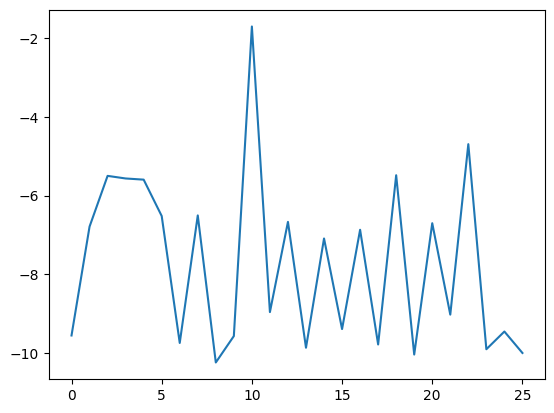

In [74]:
import matplotlib.pyplot as plt
plt.plot(sc)

In [79]:
for idx,c in enumerate(similar_chunk):
    print(c.strip('*'))
    print('*'*50)

 Diffusion-Based Tasks  
1. Synthetic Data Generation for Wheels  
   - Data was generated using diffusion models to improve training for object detection tasks.  
   - Metric: Model Tr-OCR trained only on synthetic images performed poorly but improved when mixed with real images.  
   - Key Skill: Generative AI
**************************************************
3. Diffusion-Based OCR Data Augmentation  
   - Experimented with using diffusion models to generate text-based data for OCR training.  
   - Metric: Challenges included curved text and lack of full-text captions, affecting model accuracy.  
   - Key Skill: OCR and Generative AI   python
**************************************************
5. Training a Tiny-Diffusion Model from Scratch  
   - A lightweight diffusion model was trained from zero to explore alternative architectures.  
   - Metric: After 60,000 steps, performance was still suboptimal, requiring further training.  
   - Key Skill: Model Training   python
***********

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Reference chunk
reference_chunk = '''['Python', 'C++', 'Machine Learning', 'Computer Vision', 'Data Preparation', 'Statistical Analysis', 'Data Visualization', 'Algorithm Development', 'Model Optimization', 'Deployment', 'Integration', 'Real-World Testing', 'Model Monitoring']'''


# Convert the reference_chunk and resume_chunks into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform([reference_chunk] + resume_chunks)

# Compute cosine similarity between the reference_chunk and each resume_chunk
similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

# Set the similarity threshold
similarity_threshold = 0.06  # Adjust based on your needs

# Store similar chunks
similar_chunk = []
sc = []  # Store similarity scores

# Iterate through the chunks and filter based on the threshold
for idx, similarity_score in enumerate(similarities):
    sc.append(similarity_score)
    
    if similarity_score > similarity_threshold:
        similar_chunk.append(resume_chunks[idx])

# Output the results

print("Similarity Scores:", sc)
for idx,c in enumerate(similar_chunk):
    print(c.strip('*'))
    print('*'*50)


Similarity Scores: [0.14974809005620185, 0.025551970627045846, 0.12161552363530305, 0.05041460496740116, 0.06839313063915566, 0.010437357770907572, 0.0, 0.008896458143876119, 0.0, 0.0, 0.09533656593435197, 0.10513591302888614, 0.03573522782127271, 0.030560965251220658, 0.04280128904552389, 0.079696344512492, 0.009745653662317751, 0.021975401307065885, 0.03480818251444125, 0.0, 0.055540690954185304, 0.04651930693849703, 0.15447894079698035, 0.0, 0.02868962878143473, 0.03693413756243954]
 Diffusion-Based Tasks  
1. Synthetic Data Generation for Wheels  
   - Data was generated using diffusion models to improve training for object detection tasks.  
   - Metric: Model Tr-OCR trained only on synthetic images performed poorly but improved when mixed with real images.  
   - Key Skill: Generative AI
**************************************************
3. Diffusion-Based OCR Data Augmentation  
   - Experimented with using diffusion models to generate text-based data for OCR training.  
   - Me

In [78]:
print(similar_chunk[0])

 Diffusion-Based Tasks  
1. Synthetic Data Generation for Wheels  
   - Data was generated using diffusion models to improve training for object detection tasks.  
   - Metric: Model Tr-OCR trained only on synthetic images performed poorly but improved when mixed with real images.  
   - Key Skill: Generative AI


# Identify the key topics

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sentence_transformers import CrossEncoder
import numpy as np

def find_new_topics_from_transcript(transcript, chunk_size=500, chunk_overlap=20, similarity_threshold=-5):
    """
    Finds new topics in a podcast transcript using chunking and cross-encoder similarity.

    Args:
        transcript (str): The podcast transcript.
        chunk_size (int): The size of each text chunk.
        chunk_overlap (int): The overlap between text chunks.
        similarity_threshold (float): The threshold for similarity between chunks.

    Returns:
        list: A list of new topic chunks.
    """

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size, chunk_overlap=chunk_overlap
    )
    chunks = text_splitter.split_text(transcript)

    model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

    new_topics = [chunks[0]]  # Initialize with the first chunk
    reference_chunk = chunks[0]

    for chunk in chunks[1:]:
        pairs = [[reference_chunk, chunk]]
        scores = model.predict(pairs)
        similarity_score = scores[0]

        if similarity_score < similarity_threshold:
            new_topics.append(chunk)
            reference_chunk = chunk  # Update the reference chunk
        #else:
        #   print(f"Similarity {similarity_score:.4f} found between: \n{reference_chunk[:100]}...\nand \n{chunk[:100]}...")

    return new_topics


new_topics = find_new_topics_from_transcript(transcript_txt)

for i, topic in enumerate(new_topics):
    print(f"Topic {i+1}:\n{topic}\n{'-'*40}")

Topic 1:
In this video, we're going to have a closer look at LangChain Agents and understand what  Agents are all about.  First we're going to dive into what an agent is and understand how agents work under the  hood of LangChain.  Then we're going to have a look at what we can do with agents that we couldn't do before  and some of the future implications for businesses that are already investing in technology,  data and analytics.  And finally, I'm going to show you how to get started building your own
----------------------------------------
Topic 2:
knows about your products, which is better than before, but it's still not good enough. Because what does a chatbot really need to know in order to give the customers a good  customer experience? The chatbot needs to know stuff about the customer. If this chatbot is on  a webpage, it needs to know the context of the visit. And this could be information like,  is this a new potential customer or an existing customer? Or what is the browsi

# Look through the transcript for time stamps

In [ ]:
from sentence_transformers import CrossEncoder
import re


def parse_srt(subtitle_file):
    """Parses the subtitle file and returns a list of (start_time, text) tuples."""
    subtitles = []
    pattern = re.compile(r"(\d+)\n(\d{2}:\d{2}:\d{2},\d{3}) --> \d{2}:\d{2}:\d{2},\d{3}\n(.+?)(?=\n\d+\n|\Z)", re.DOTALL)
    
    with open(subtitle_file, "r", encoding="utf-8") as file:
        content = file.read()
    
    matches = pattern.findall(content)
    for _, start_time, text in matches:
        cleaned_text = text.replace("\n", " ").strip()
        # Convert HH:MM:SS,mmm to MM:SS
        hours, minutes, seconds_ms = start_time.split(":")
        seconds, milliseconds = seconds_ms.split(",")
        start_time_MMSS = f"{minutes}:{seconds}"
        subtitles.append((start_time_MMSS, cleaned_text))
    
    return subtitles

def find_best_timestamps(subtitle_file, queries):
    """Finds the best subtitle match for each query and returns the start timestamps."""
    subtitles = parse_srt(subtitle_file)
    texts = [text for _, text in subtitles]
    start_times = [start for start, _ in subtitles]

    model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")
    
    query_timestamps = {}
    for query in queries:
        scores = model.predict([[query, text] for text in texts])
        best_idx = scores.argmax()
        query_timestamps[start_times[best_idx]] = query
    
    return query_timestamps

# Example usage:
queries =  new_topics

subtitle_file = "results/subtitles.srt"  # Replace with your actual subtitle file path

timestamps = find_best_timestamps(subtitle_file, queries)
# Function to convert timestamp to minutes and seconds for sorting
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

# Sort dictionary by timestamp
timestamps = dict(sorted(timestamps.items(), key=lambda x: time_to_seconds(x[0])))
print(timestamps)

{'00:00': "In this video, we're going to have a closer look at LangChain Agents and understand what  Agents are all about.  First we're going to dive into what an agent is and understand how agents work under the  hood of LangChain.  Then we're going to have a look at what we can do with agents that we couldn't do before  and some of the future implications for businesses that are already investing in technology,  data and analytics.  And finally, I'm going to show you how to get started building your own", '01:18': "knows about your products, which is better than before, but it's still not good enough. Because what does a chatbot really need to know in order to give the customers a good  customer experience? The chatbot needs to know stuff about the customer. If this chatbot is on  a webpage, it needs to know the context of the visit. And this could be information like,  is this a new potential customer or an existing customer? Or what is the browsing history of this visitor?  What pr

# Rephrase the chapter names using llm 

In [19]:
def rephrase_chapter(chapter_text):
    SYSTEM_PROMPT = '''rephrase this chapter name to make it look like a standalone video title (not too flashy keep it simple, do not use bloat words like mastering, unlocking, embarking etc).
    The sentence should be easily understandable and concise. 
    however the title should not be more than 60 characters
    Do not include any additional text or numbering.'''
    messages = [
        {"role": "system", "content": SYSTEM_PROMPT},
        {"role": "user", "content": f'''CHAPTER TEXT: {chapter_text}'''}
    ]

    prompt = tokenizer.apply_chat_template(messages, tokenize=False)
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    # print(prompt)

    with torch.no_grad():
        output = model.generate(
            **inputs,
            do_sample=False,
            max_new_tokens=50,
        )

    processed_text = tokenizer.decode(output[0][len(inputs.input_ids[0])+3:], skip_special_tokens=True)
    return processed_text.strip()



In [20]:
chapter_timestamps=[]

for ts in timestamps:
    chapter_name = rephrase_chapter(timestamps[ts])
    chapter_timestamps.append(f'''{ts} - {chapter_name.strip('"').strip("'")}''')

print('\n'.join(chapter_timestamps))

c:\Users\User\miniconda3\envs\torch_env\Lib\site-packages\transformers\generation\configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
c:\Users\User\miniconda3\envs\torch_env\Lib\site-packages\transformers\generation\configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


00:00 - Understanding LangChain Agents
01:18 - Unlocking Customer Insights for Better Chatbot Experience
02:14 - Building Tools for Language Models
04:18 - 5 Key Channels for Business Communication
04:43 - ChatGPT: The Future of Language Understanding
06:21 - Shopify API Data Extraction with Python
07:59 - Defining a Shopify Agent with GBT4


# Youtube video downloader

In [38]:
import yt_dlp

def download_youtube_video(url, output_path="."):
    """
    Downloads a YouTube video using yt-dlp.

    Args:
        url (str): The YouTube video URL.
        output_path (str): The directory where the video will be saved.
    """
    ydl_opts = {
        'outtmpl': f'{output_path}/%(title)s.%(ext)s', # output template
        'format': 'bestvideo[height<=?1080]+bestaudio/best', # best video and audio, max 1080p
        'merge_output_format': 'mp4', # merge to mp4
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([url])
        print("Download complete.")

    except Exception as e:
        print(f"An error occurred: {e}")



# Example usage:
video_url = "https://www.youtube.com/watch?v=Xi9Ui-9qcPw&t=170s" # Replace with your YouTube URL.
download_youtube_video(video_url) # Downloads to the current directory

# Example with a specific output path:
# download_youtube_video(video_url, output_path="/path/to/your/videos")

[youtube] Extracting URL: https://www.youtube.com/watch?v=Xi9Ui-9qcPw&t=170s
[youtube] Xi9Ui-9qcPw: Downloading webpage
[youtube] Xi9Ui-9qcPw: Downloading tv client config
[youtube] Xi9Ui-9qcPw: Downloading player 4fcd6e4a
[youtube] Xi9Ui-9qcPw: Downloading tv player API JSON
[youtube] Xi9Ui-9qcPw: Downloading ios player API JSON
[youtube] Xi9Ui-9qcPw: Downloading m3u8 information
[info] Xi9Ui-9qcPw: Downloading 1 format(s): 248+251
[download] Destination: LangChain Agents： Simply Explained!.f248.webm
[download] 100% of   12.45MiB in 00:00:00 at 43.77MiB/s    
[download] Destination: LangChain Agents： Simply Explained!.f251.webm
[download] 100% of    8.59MiB in 00:00:00 at 43.95MiB/s  
[Merger] Merging formats into "LangChain Agents： Simply Explained!.mp4"
Deleting original file LangChain Agents： Simply Explained!.f248.webm (pass -k to keep)
Deleting original file LangChain Agents： Simply Explained!.f251.webm (pass -k to keep)
Download complete.
